In [1]:
!pip install transformers datasets evaluate accelerate
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
from transformers import pipeline

#classifier = pipeline("sentiment-analysis")
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation = True)

Device set to use cpu


In [6]:

df = pd.read_csv('/content/youtube_comments_2025-01-30_17-41.csv')

In [9]:
def get_sentiment(text):
    result = classifier(text)[0]
    return pd.Series([result['label'], round(result['score'], 4)])

df[['sentiment_label', 'sentiment_score']] = df['Comment Text'].apply(get_sentiment)


In [10]:
df.head()

,Video ID,Channel Name,Comment Author,Comment Text,Published At,Like Count,sentiment_label,sentiment_score
0,V-Fla5hxMRg,UCrp_UI8XtuYfpiqluWLD7Lw,@4vrstand,oh it gets SOOOOOO Much better folks! Now as...,2025-01-30T16:51:19Z,0,1 star,0.5563
1,V-Fla5hxMRg,UCrp_UI8XtuYfpiqluWLD7Lw,@san3570,No wonder they prosecuted Huawei Meng Wenzhou ...,2025-01-30T15:49:14Z,0,1 star,0.5370
2,V-Fla5hxMRg,UCrp_UI8XtuYfpiqluWLD7Lw,@chloecroad,"I used both ChatGPT and DeepSeek , unfortunate...",2025-01-30T14:25:49Z,0,3 stars,0.3183
3,V-Fla5hxMRg,UCrp_UI8XtuYfpiqluWLD7Lw,@chloecroad,"Thanks so much for DeepSeek , I am a amateur o...",2025-01-30T14:14:30Z,0,5 stars,0.6393
4,V-Fla5hxMRg,UCrp_UI8XtuYfpiqluWLD7Lw,@jeffDwyer1,Wow DeepSeek just knocked Nvidia off its pedes...,2025-01-30T14:07:21Z,5,5 stars,0.7635


In [11]:


# Creating a mapping dictionary for Channel IDs to Channel Names
channel_mapping = {
    "V-Fla5hxMRg": "CNBC",
    "jxZ915PvdbU": "FirstPost",
    "x52g-BpjGHA": "Bloomberg"
}

# Adding the "Channel Name" column based on the mapping
df["Channel Name"] = df["Video ID"].map(channel_mapping)



In [15]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
1 star,3516
5 stars,2261
2 stars,737
3 stars,694
4 stars,418


In [17]:
df[df['Channel Name']=='CNBC']['sentiment_label'].value_counts()

,count
sentiment_label,
1 star,2546
5 stars,1607
2 stars,538
3 stars,461
4 stars,292


In [19]:
df.shape

(7626, 8)

In [20]:
df[df['Channel Name']=='CNBC'].shape

(5444, 8)

In [21]:
df[df['Channel Name']=='FirstPost'].shape

(1841, 8)

In [22]:
df[df['Channel Name']=='Bloomberg'].shape

(341, 8)

In [23]:
from google.colab import files

df.to_csv('channel_data.csv', index=False)  # Save DataFrame as CSV
files.download('channel_data.csv')  # Download the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['Published At'] = pd.to_datetime(df['Published At'])


In [26]:
# Convert the 'Published At' column to datetime format
df['Published At'] = pd.to_datetime(df['Published At'])

# Extract the hour from the timestamp
df['Hour'] = df['Published At'].dt.hour

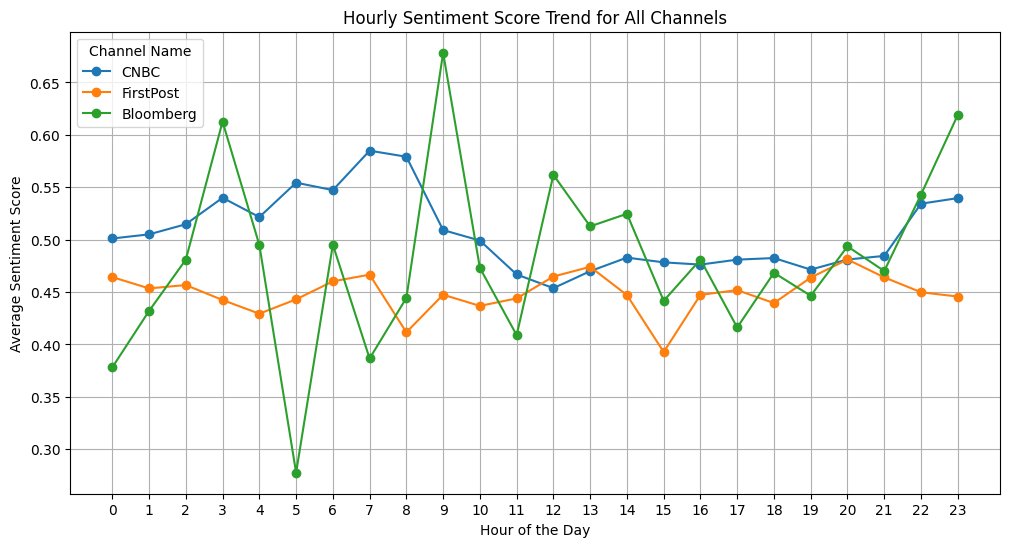

In [27]:


# Extract unique channels
channels = df["Channel Name"].unique()
# Plot all three channels in the same graph
plt.figure(figsize=(12, 6))

for channel in channels:
    channel_data = df[df["Channel Name"] == channel].groupby("Hour")["sentiment_score"].mean().reset_index()
    plt.plot(channel_data["Hour"], channel_data["sentiment_score"], marker="o", linestyle="-", label=channel)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Sentiment Score")
plt.title("Hourly Sentiment Score Trend for All Channels")
plt.legend(title="Channel Name")
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all 24 hours are visible

# Show the plot
plt.show()


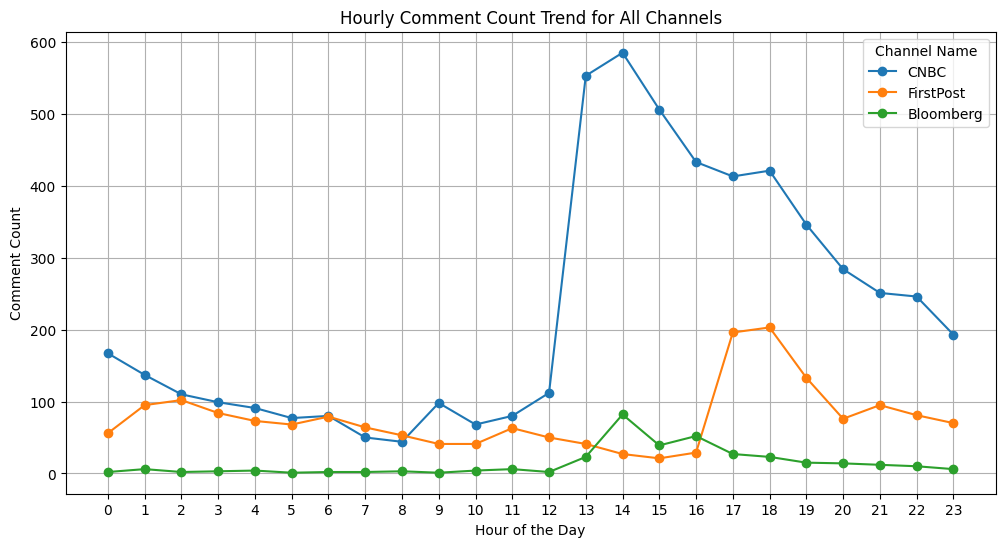

In [28]:
# Create a new figure for comment count trends
plt.figure(figsize=(12, 6))

# Plot each channel's comment count trend
for channel in channels:
    channel_data = df[df["Channel Name"] == channel].groupby("Hour").size().reset_index(name="Comment Count")
    plt.plot(channel_data["Hour"], channel_data["Comment Count"], marker="o", linestyle="-", label=channel)

# Labeling the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Comment Count")
plt.title("Hourly Comment Count Trend for All Channels")
plt.legend(title="Channel Name")
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all 24 hours are visible

# Show the plot
plt.show()


In [29]:
import plotly.express as px

# Count the occurrences of each star rating per channel
star_rating_counts = df.groupby(["Channel Name", "sentiment_label"]).size().reset_index(name="Count")

# Create an interactive bar chart for each channel
fig = px.bar(star_rating_counts, x="sentiment_label", y="Count", color="Channel Name",
             barmode="group", title="Star Ratings Distribution per Channel")

# Show the interactive chart
fig.show()


<ipython-input-30-57615273e2d7>:5: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



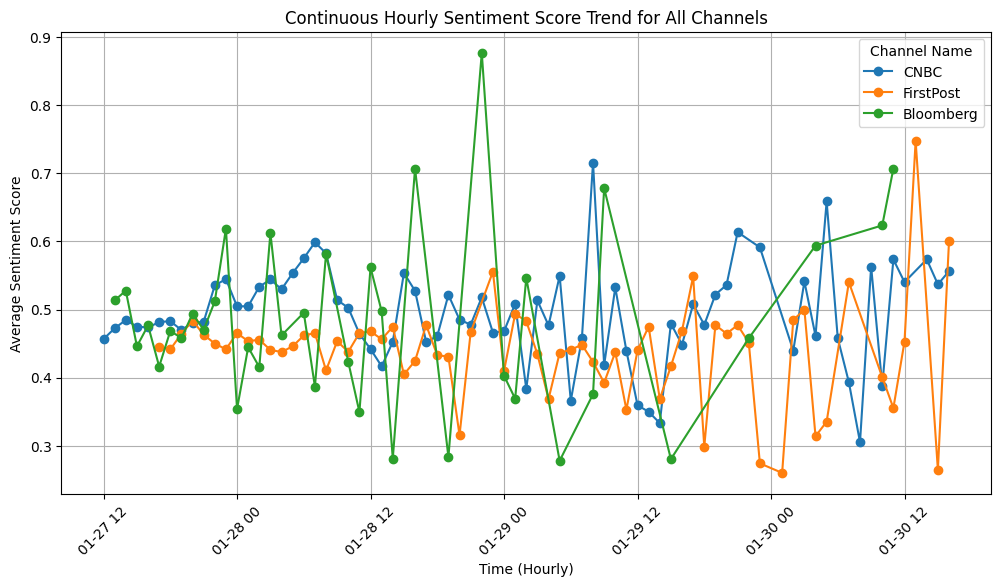

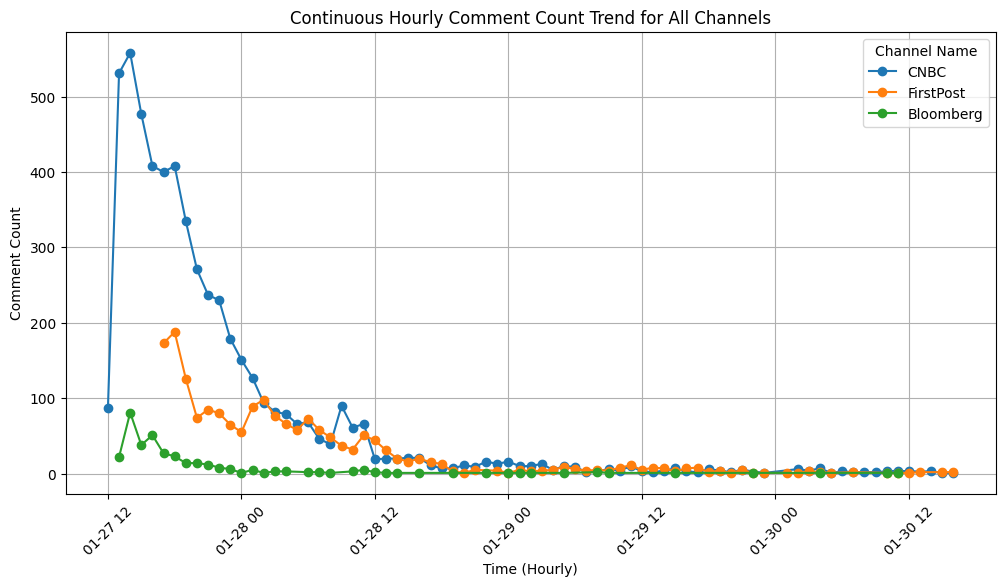

In [30]:
# Convert 'Published At' to a datetime object if not already
df["Published At"] = pd.to_datetime(df["Published At"])

# Truncate timestamps to the nearest hour
df["Published Hour"] = df["Published At"].dt.floor("H")

# Group by 'Published Hour' to get continuous hourly trends
hourly_sentiment_continuous = df.groupby(["Published Hour", "Channel Name"])["sentiment_score"].mean().reset_index()
hourly_comments_continuous = df.groupby(["Published Hour", "Channel Name"]).size().reset_index(name="Comment Count")

# Plot continuous hourly sentiment trend
plt.figure(figsize=(12, 6))
for channel in channels:
    channel_data = hourly_sentiment_continuous[hourly_sentiment_continuous["Channel Name"] == channel]
    plt.plot(channel_data["Published Hour"], channel_data["sentiment_score"], marker="o", linestyle="-", label=channel)

plt.xlabel("Time (Hourly)")
plt.ylabel("Average Sentiment Score")
plt.title("Continuous Hourly Sentiment Score Trend for All Channels")
plt.legend(title="Channel Name")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

# Plot continuous hourly comment count trend
plt.figure(figsize=(12, 6))
for channel in channels:
    channel_data = hourly_comments_continuous[hourly_comments_continuous["Channel Name"] == channel]
    plt.plot(channel_data["Published Hour"], channel_data["Comment Count"], marker="o", linestyle="-", label=channel)

plt.xlabel("Time (Hourly)")
plt.ylabel("Comment Count")
plt.title("Continuous Hourly Comment Count Trend for All Channels")
plt.legend(title="Channel Name")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


In [31]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

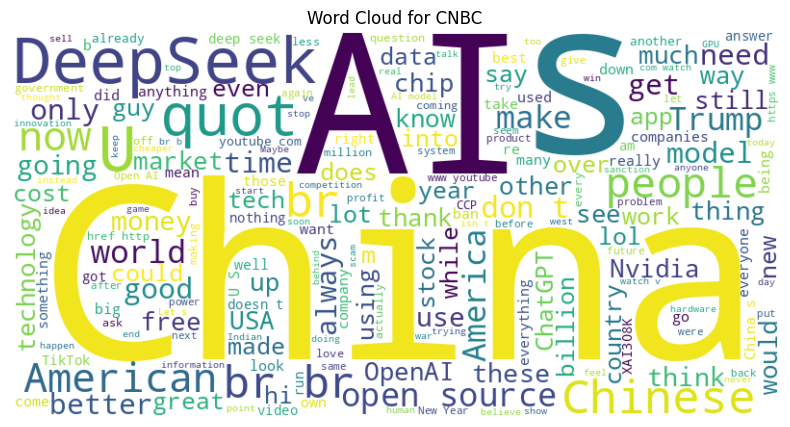

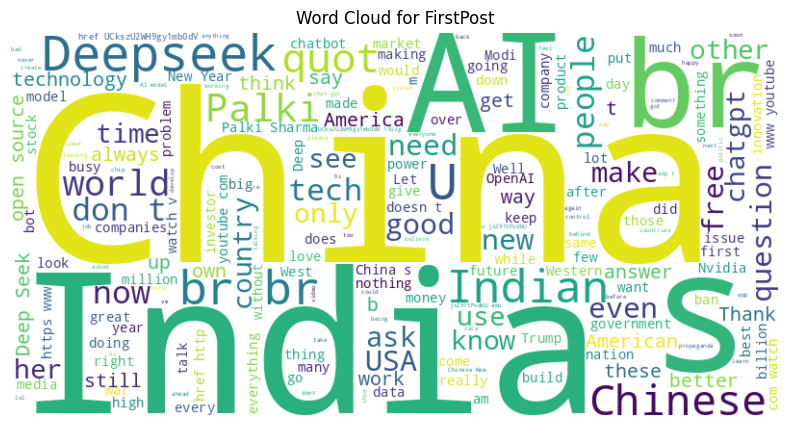

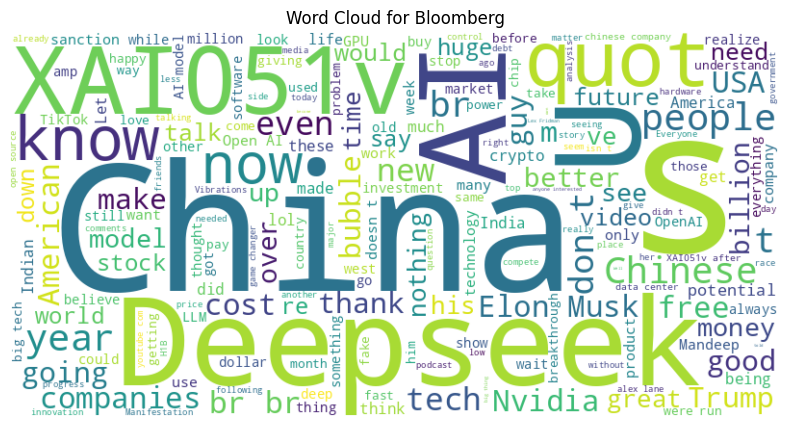

In [32]:
# Define a custom set of stopwords (since NLTK stopwords cannot be downloaded)
custom_stopwords = set([
    "the", "and", "to", "of", "a", "in", "is", "it", "for", "on", "this", "that", "with",
    "as", "was", "are", "at", "be", "by", "an", "or", "from", "which", "but", "not", "we",
    "they", "you", "i", "have", "has", "had", "will", "can", "if", "so", "about", "there",
    "one", "when", "what", "how", "their", "some", "more", "out", "just", "who", "all", "my",
    "do", "your", "he", "she", "them", "been", "me", "no", "where", "like", "also", "any",
    "very", "because", "then", "should", "its", "than", "most", "such", "why", "our", "here"
])

# Function to generate word cloud for a specific channel
def generate_wordcloud(channel_name, text_data):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=custom_stopwords,
        colormap='viridis'
    ).generate(" ".join(text_data))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {channel_name}")
    plt.show()

# Generate word clouds for each channel
for channel in channels:
    text_data = df[df["Channel Name"] == channel]["Comment Text"].dropna()
    generate_wordcloud(channel, text_data)
